In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/Users/ayushkarak/Desktop/DAV_1_notes/aerofit_treadmill.csv")
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# **1 - Defining Problem Statement and Analysing basic metrics** 
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [7]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Data types and non-null counts
print("\nData types and missing values:")
print(df.info())



Shape of the dataset: (180, 9)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [9]:
# Convert relevant object types to 'category' for memory and analytics
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
df[categorical_cols] = df[categorical_cols].astype('category')
df.dtypes


Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [11]:
# Numerical summary
print("Summary of numerical columns:")
print(df.describe())

# Categorical summary
print("\nSummary of categorical columns:")
print(df.describe(include='category'))


Summary of numerical columns:
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  

Summary of categorical columns:
       Product Gender MaritalStatus
count      180    180           180
unique       3      2             2


## observation

1 - The dataset contains 180 rows and 9 columns.
2 - No missing values detected.
3 - Categorical columns (Product, Gender, MaritalStatus) have been converted to category type.
4 - Age ranges from 18 to 50, and Fitness ratings are on a 1 to 5 scale.
5 - Income ranges from 29K to 104K, showing a wide spread.
6 - Product KP281 is the most purchased treadmill (44.4%), followed by KP481 and KP781.


# **2 - Non-Graphical Analysis: Value counts and unique attributes**

In [15]:
# Unique values in each column
for col in df.columns:
    print(f"{col} → {df[col].nunique()} unique values")


Product → 3 unique values
Age → 32 unique values
Gender → 2 unique values
Education → 8 unique values
MaritalStatus → 2 unique values
Usage → 6 unique values
Fitness → 5 unique values
Income → 62 unique values
Miles → 37 unique values


In [17]:
# Display unique values for categorical features
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique().tolist()}")



Unique values in 'Product': ['KP281', 'KP481', 'KP781']

Unique values in 'Gender': ['Male', 'Female']

Unique values in 'MaritalStatus': ['Single', 'Partnered']


In [19]:
# Value counts (with percentages)
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())
    print("\nPercentage distribution:")
    print(df[col].value_counts(normalize=True) * 100)



Value counts for 'Product':
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Percentage distribution:
Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

Value counts for 'Gender':
Gender
Male      104
Female     76
Name: count, dtype: int64

Percentage distribution:
Gender
Male      57.777778
Female    42.222222
Name: proportion, dtype: float64

Value counts for 'MaritalStatus':
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Percentage distribution:
MaritalStatus
Partnered    59.444444
Single       40.555556
Name: proportion, dtype: float64


## Business Insights:
1. KP281 is the most popular treadmill, purchased by nearly 44% of customers — likely due to its entry-level pricing and accessibility.
2. Male customers slightly outnumber female customers, but both genders are actively buying all three models.
3. Partnered customers are more likely to buy treadmills than single ones — possibly indicating shared fitness goals or dual-income households.
4. There’s a clear segmentation in product interest, suggesting that customer profiles differ by product tier.


## Recommendations:

1. **Promote KP281 through budget-friendly campaigns** — especially targeting younger or first-time buyers.
2. **Market treadmills as couple-friendly purchases** — highlight partner workouts or shared fitness goals.
3. **Use gender-neutral advertising** — both men and women are strong buyers, so avoid biased messaging.
4. **Ask new customers 2–3 questions at purchase** (e.g., income, usage level, fitness goal) to guide them toward the most suitable product.
5. **Bundle KP781 with premium features or coaching programs** — since it's bought by more serious runners or fitness enthusiasts.


# **3 - Visual Analysis - Univariate & Bivariate**



## **3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

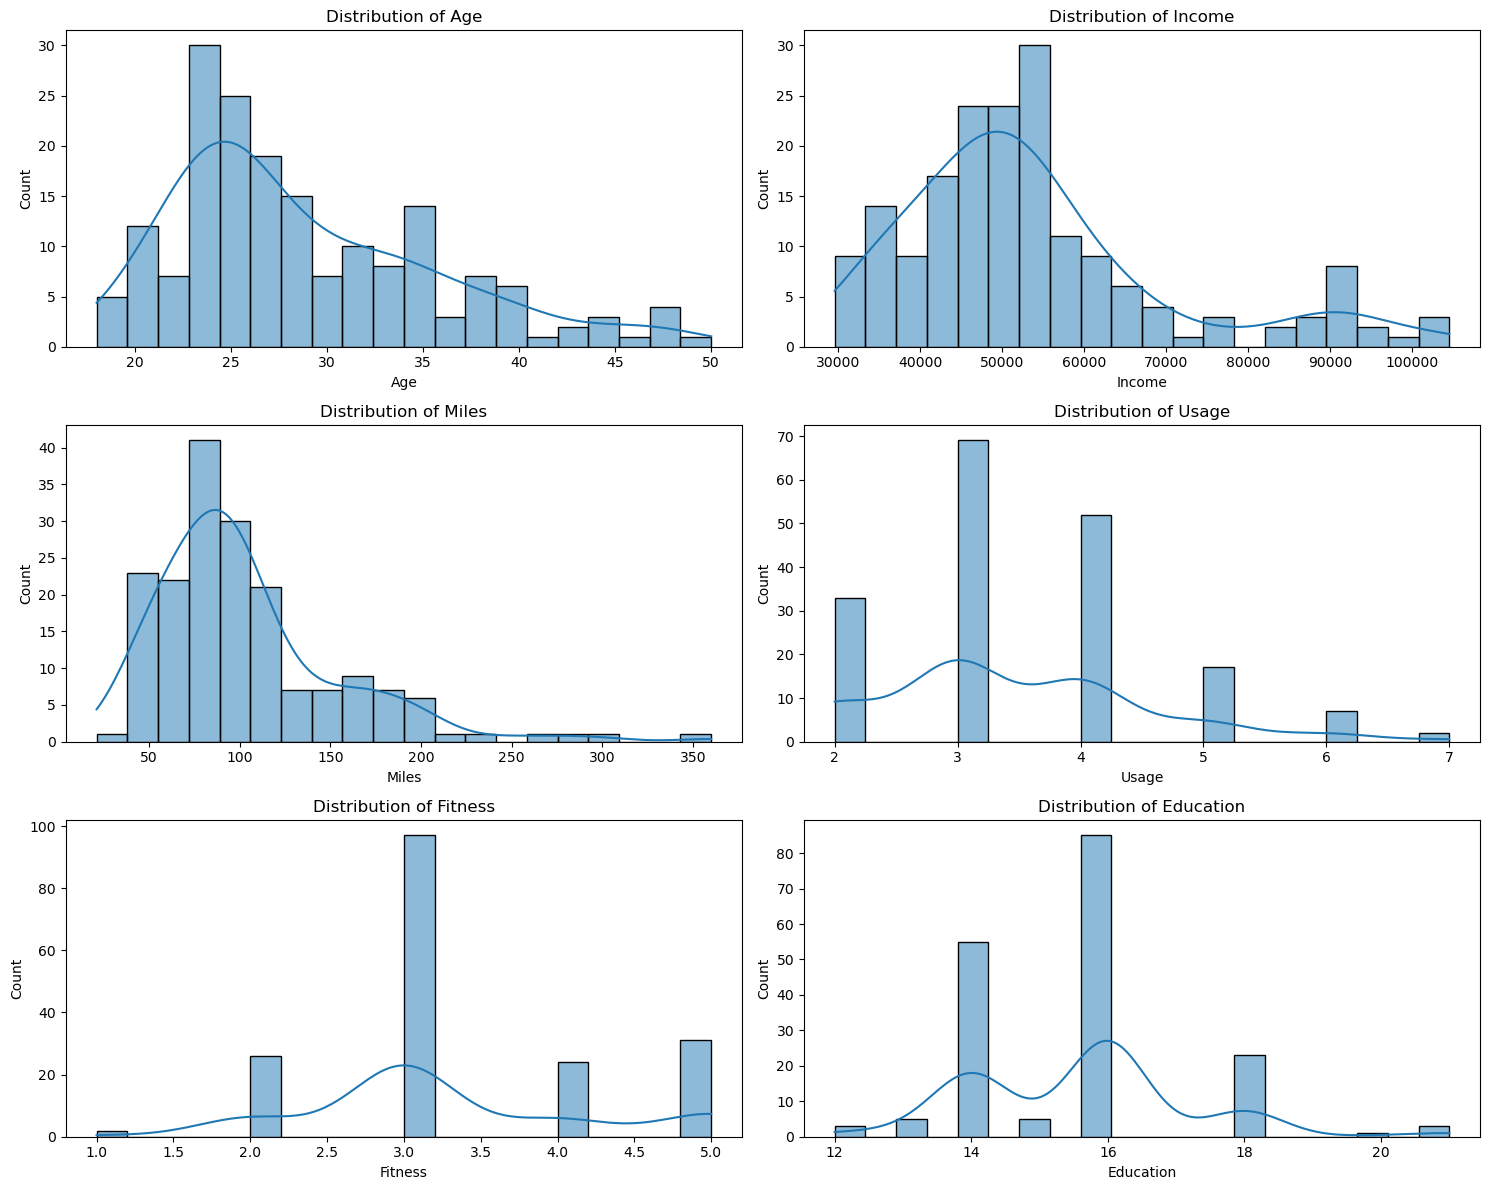

In [36]:
# Continuous variables
continuous_cols = ['Age', 'Income', 'Miles', 'Usage', 'Fitness', 'Education']

# Plot distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


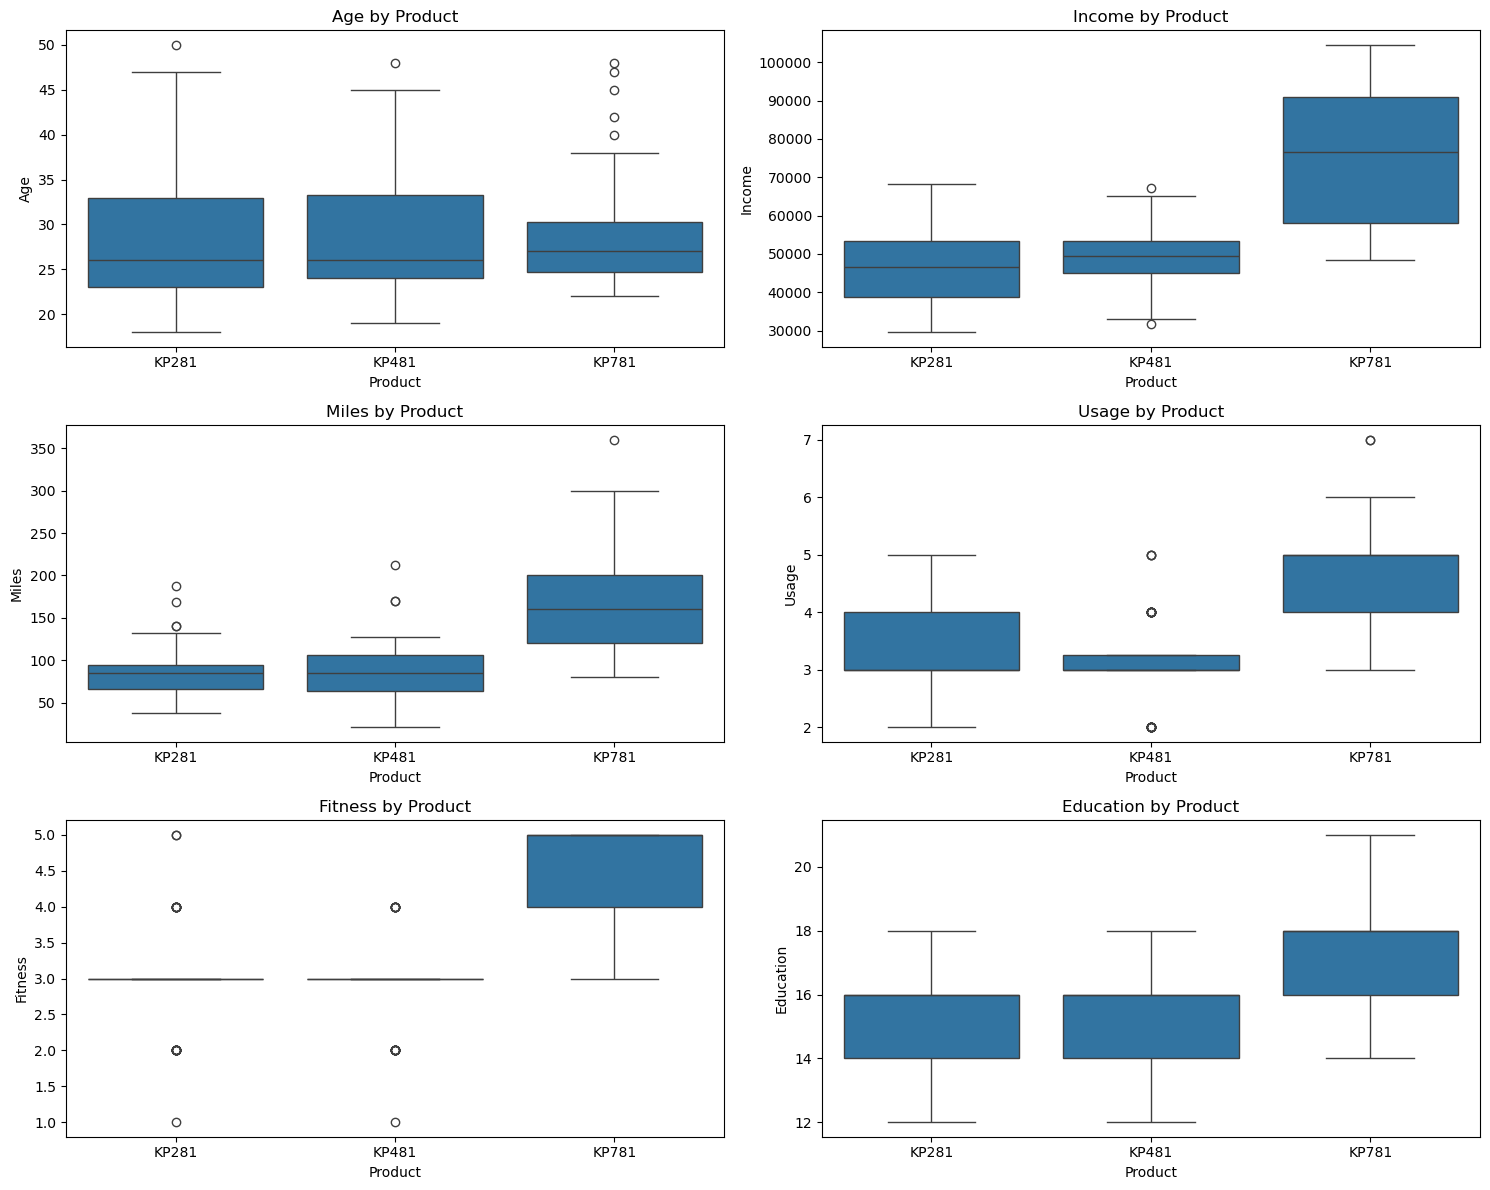

In [38]:
# Bivariate boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='Product', y=col)
    plt.title(f'{col} by Product')
plt.tight_layout()
plt.show()


## Business Insights:

1. Most Aerofit customers are in their 20s and early 30s — a young, health-conscious audience.
2. The typical customer earns between 40,000 to 60,000 per year.
3. Customers aim to walk/run around 60–100 miles per week — indicating strong motivation for fitness.
4. Most buyers rate their fitness at 3 or 4 out of 5 — meaning they’re moderately fit and likely improving.
5. KP281 is preferred by younger, average-income users — likely first-time treadmill buyers.
6. KP781 appeals to older, high-income, high-fitness customers — serious about their workouts.
7. KP481 is the go-to option for mid-income, moderately fit individuals — perfect for casual runners or regular gym-goers.


## Recommendations:

1. Target customers aged 20–35 with fitness-focused campaigns — that’s your core audience.
2. Promote KP281 with student discounts or “starter fitness kits” to attract young buyers.
3. Position KP781 as the "serious athlete's choice" — target high-income professionals or older fitness enthusiasts.
4. Use lifestyle imagery in ads showing users jogging 60–100 miles/month — it matches user goals.
5. Consider financing options for KP781 to make it more accessible to aspirational buyers.
6. Bundle fitness programs or coaching sessions with mid-range (KP481) models to add value.


## **3.2 For categorical variable(s): Boxplot**

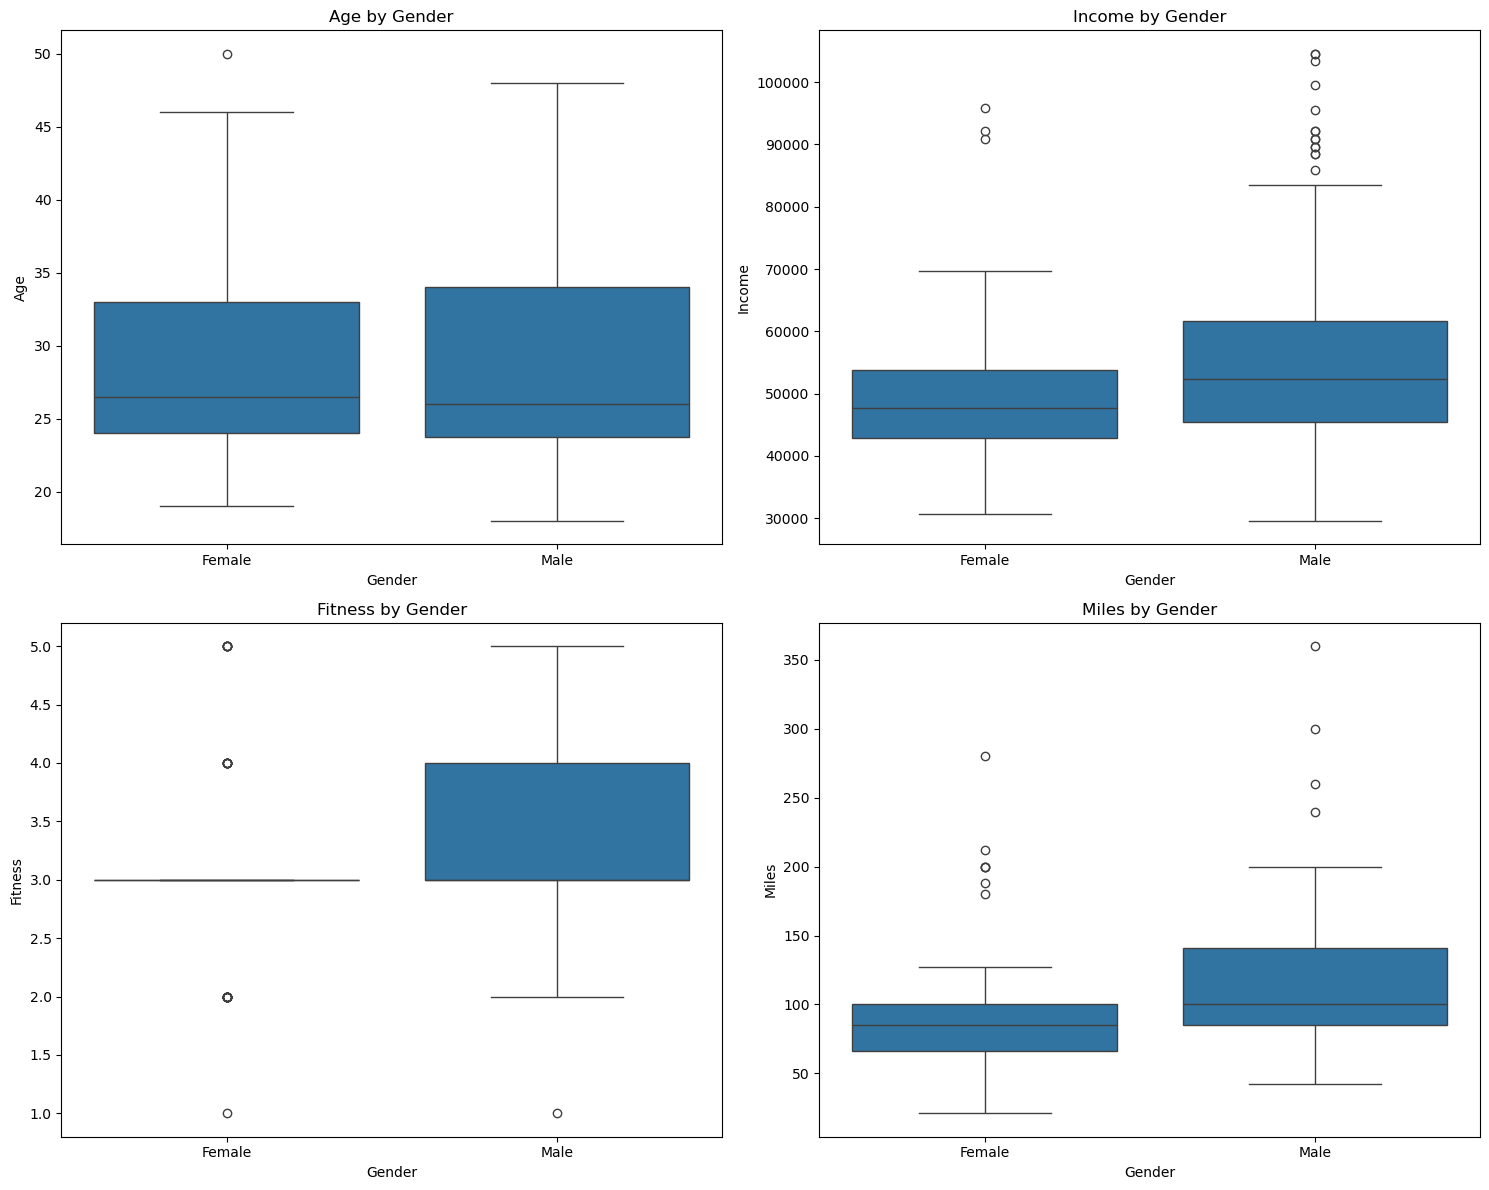

In [51]:
# Gender vs continuous variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(['Age', 'Income', 'Fitness', 'Miles'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Gender', y=col)
    plt.title(f'{col} by Gender')
plt.tight_layout()
plt.show()


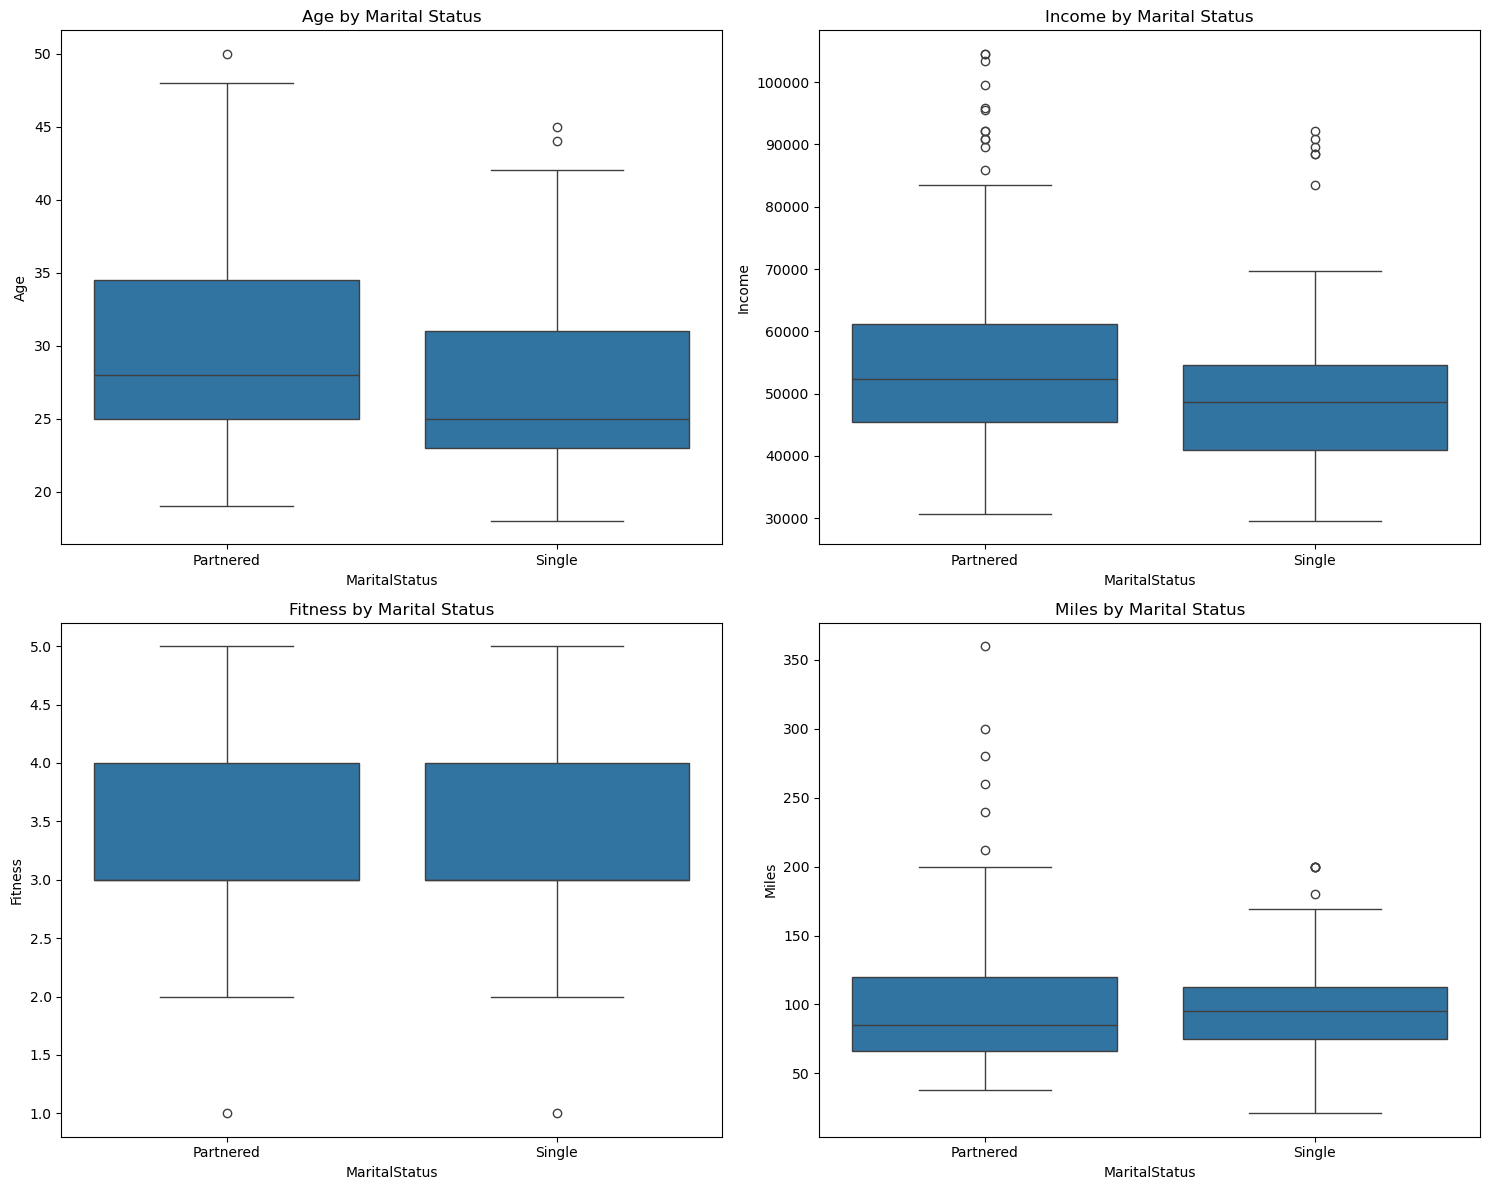

In [53]:
# MaritalStatus vs continuous variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(['Age', 'Income', 'Fitness', 'Miles'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='MaritalStatus', y=col)
    plt.title(f'{col} by Marital Status')
plt.tight_layout()
plt.show()


## Business Insights

1. Male customers generally earn slightly more than females, which may affect their willingness to buy higher-priced products.
2. Fitness levels are quite similar across genders, indicating that both males and females are equally engaged in their fitness goals.
3. Partnered customers are typically older and have higher income, making them more likely to afford and justify premium purchases (like KP781).
4. Partnered individuals also show higher activity levels, suggesting they’re more invested in long-term fitness.


## Recommendations


1. Focus KP781 promotions on older, partnered individuals with higher income — they’re most likely to buy it.
2. Keep marketing balanced for both men and women — fitness engagement is equal, so avoid gender bias.
3. Create marketing campaigns around “couples who train together” — could appeal to partnered customers looking to stay fit together.
4. Offer personalized recommendations based on marital status — e.g., bundle offers for couples or solo-use treadmills for singles.
5. Use testimonials and ad messaging from both genders and relationship statuses to build wider appeal.


## **3.3 For correlation: Heatmaps, Pairplots**

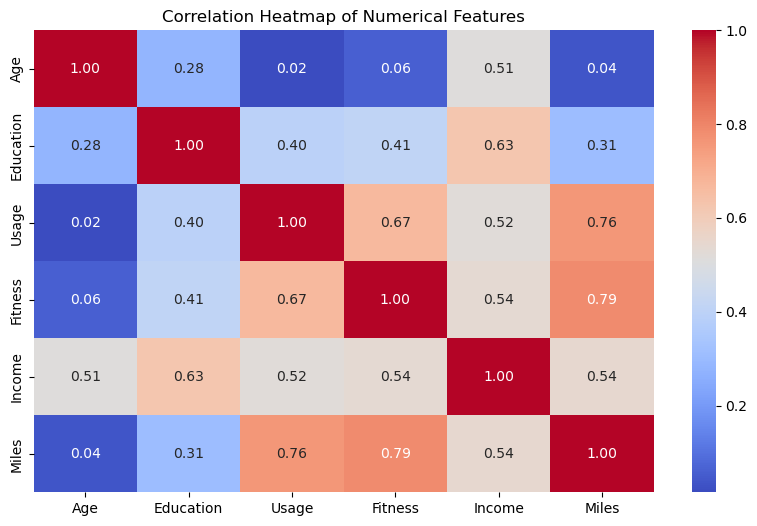

In [68]:
# Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


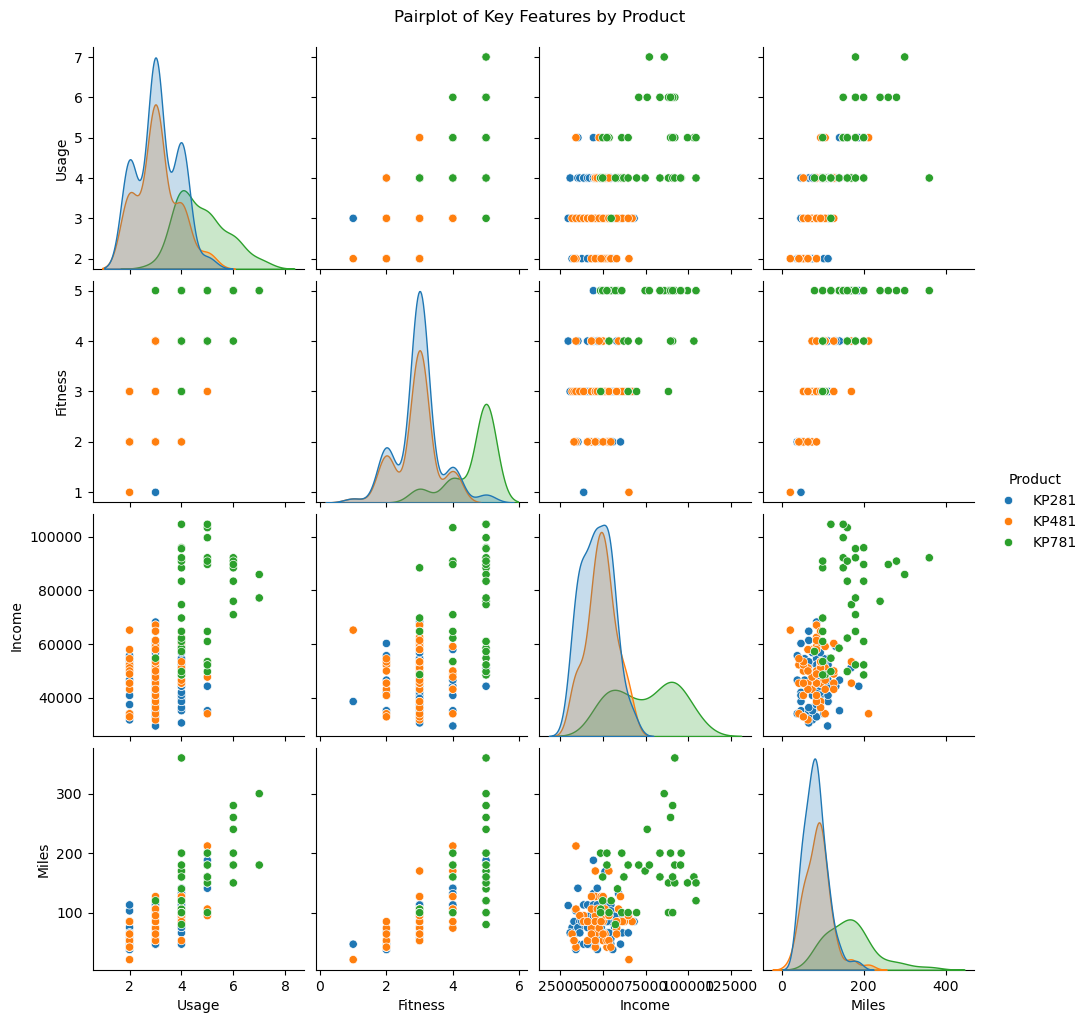

In [70]:
# Pairplot with hue = Product
sns.pairplot(df, hue='Product', vars=['Usage', 'Fitness', 'Income', 'Miles'])
plt.suptitle("Pairplot of Key Features by Product", y=1.02)
plt.show()


## Business Insights

1. **Fitness and Miles have a strong positive correlation** — customers who rate themselves as more fit tend to run/walk more miles per week.
2. **Usage is highly correlated with both Fitness and Miles** — those who use the treadmill more often tend to be fitter and cover more distance.
3. **Income is moderately correlated with Education and Fitness** — suggesting that more educated and fit people tend to earn more.
4. **The pairplot shows clear product segmentation** — KP781 customers cluster toward high fitness, usage, and income, while KP281 clusters lower.


## Recommendations

1. Promote fitness challenges or distance goals to high-usage customers — they’re already active and will respond well.
2. Highlight KP781 for people aiming to increase fitness and usage — it aligns with their needs.
3. Use education level in customer profiling — more educated users may be open to advanced features and subscriptions.
4. Use machine learning-based recommendation systems to suggest treadmills based on income, fitness level, and miles.


# **4 - Missing Value & Outlier Detection** 

In [84]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


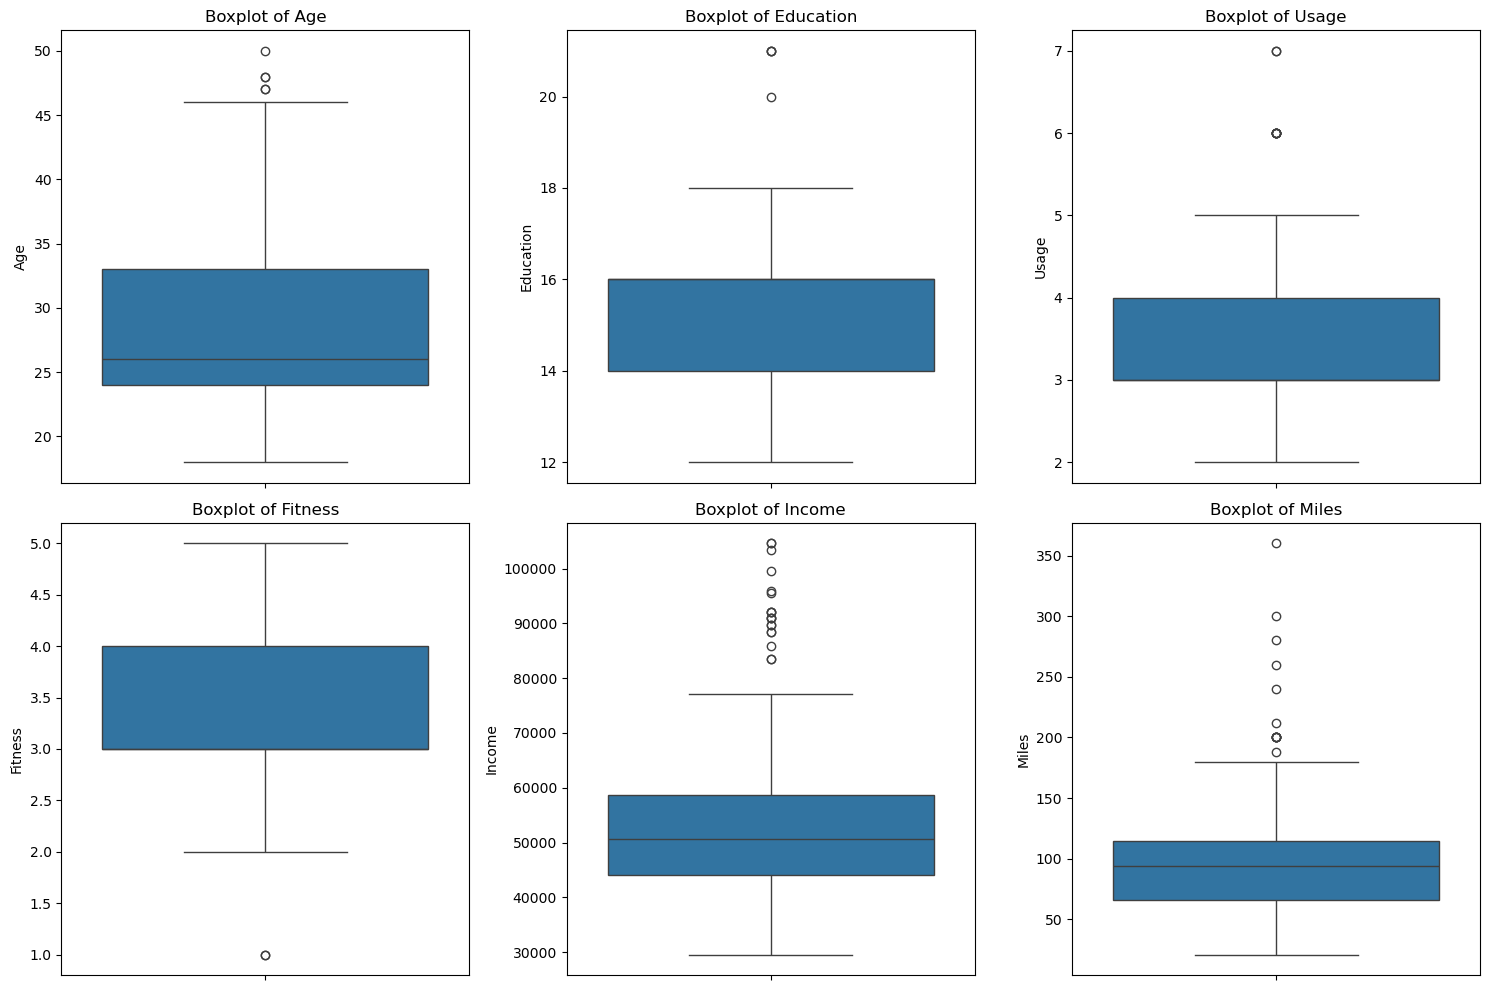

In [86]:
# Numeric columns to check for outliers
numeric_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [88]:
# Mean - Median Difference
mean_median_diff = df[numeric_cols].mean() - df[numeric_cols].median()
print("Mean - Median Difference:\n")
print(mean_median_diff)

Mean - Median Difference:

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64


## Insights 

1. Most numeric features show small differences between mean and median, suggesting relatively symmetric distributions.
2. Income and Miles show some outliers — with values much higher than the rest.
3. Boxplots confirm a few extreme values, especially in **Miles (up to 360 miles/week) and Income (up to $104,000).


## Recommendations 

1. Review extremely high income and miles records — confirm if they’re real or data entry errors.
2. Consider segmenting high-mileage users separately — they may need advanced features, maintenance plans, or premium support.
3. Do not remove outliers blindly — they could represent your most valuable (or demanding) customers.
